In [3]:
import numpy as np
import copy
import sys
import time

# setting path
sys.path.append('./helper')
sys.path.append('./model')

from SoftmaxCrossEntropyLoss import SoftmaxCrossEntropyLoss
from BatchNorm import BatchNorm
from Dropout import Dropout
from LinearMap import LinearMap
from CNN import ConvNet
from helper import labels2onehot, getAccuracy
from Conv import Conv
from helper import im2col, im2col_bw
from MaxPool import MaxPool

In [2]:
#import cifar10 dataset
#The dataset are stored by batches in multiple pickle files

from load_cifar import trainX, trainy, testX, testy

#normalize dataset to [0,1]
trainX = trainX.astype(float)/255.0 #has shape (batch_size x indim)
testX = testX.astype(float)/255.0  #has shape (batch_size x indim)

trainLabels = labels2onehot(trainy)
testLabels = labels2onehot(testy)


In [5]:
train_size    = 50000
test_size     = 10000
batch_size    = 128
epoch         = 2
hidden_size   = 1000
out_size      = 10
num_batches   = int(train_size/batch_size)
crop_trainX   = num_batches * batch_size

#reshape to [N,C,H,W]
trainX = trainX.reshape((train_size, 3, 32, 32))
testX  = testX.reshape((test_size, 3, 32, 32))

NameError: name 'trainX' is not defined

In [26]:
"""
    Architecture 1
     
     Conv -> Relu -> MaxPool -> Linear -> Softmax
     input shape 3x32x32
     filter size of 1x5x5
     MaxPooling with a 2x2 filter of stride 2
     output 10 neurons
"""
in_shape    = (3, 32, 32)
hidden_size = 256
out         = 10
conv_filter = (1,5,5)
pool_filter = (2,2)
conv_stride = 1
pool_stride = 2
conv_pad    = 2
mm          = 0.9
lr          = 0.001


# model1      = ConvNet(in_shape, hidden_size, out, conv_filter, pool_filter, conv_stride, conv_pad, pool_stride, mm, lr)
# train_loss = []
# test_loss  = []
# train_acc  = []
# test_acc   = []

start_time = time.time()
for k in range(epoch):
    #randomly permute the dataset
    random_order          = np.random.permutation(train_size)[:crop_trainX]
    shuffled_trainX       = trainX[random_order, :]
    shuffled_trainLabels  = trainLabels[random_order, :]
    batches_trainX        = np.split(shuffled_trainX, num_batches)
    batches_trainLabels   = np.split(shuffled_trainLabels, num_batches)
    
    #first train the model
    total_train_loss      = 0
    total_acc             = 0
    for idx, batch_X in enumerate(batches_trainX):
        batch_labels      = batches_trainLabels[idx]
        #softmax returns sum of losses for CNN
        loss, pred        = model1.forward(batch_X, batch_labels)
        total_train_loss += loss
        
        #calculate acc
        acc               = getAccuracy(batch_labels, pred)
        total_acc        += acc
        
        #backpropogate
        model1.backward()
        #update & reset
        model1.update()
    #avg loss before adding
    train_loss.append(total_train_loss / train_size)  
    train_acc.append(total_acc / train_size)
    
    #now evaluate the model on the test set
    loss, pred = model1.forward(testX, testLabels)
    acc        = getAccuracy(testLabels, pred)
    test_loss.append(loss)
    test_acc.append(acc / test_size)
    
# np.save('../result/train_loss_cnn', train_loss)
# np.save('../result/train_acc_cnn', test_loss)
# np.save('../result/test_loss_cnn', train_acc)
# np.save('../result/test_acc_cnn', test_acc)



In [27]:

len(test_loss)

50

In [29]:
# np.save('../result/train_loss_cnn', train_loss)
# np.save('../result/train_acc_cnn', test_loss)
# np.save('../result/test_loss_cnn', train_acc)
# np.save('../result/test_acc_cnn', test_acc)

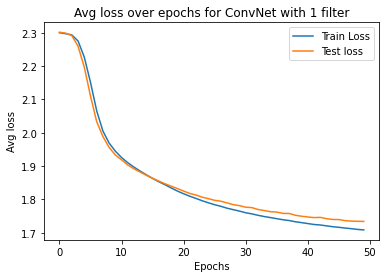

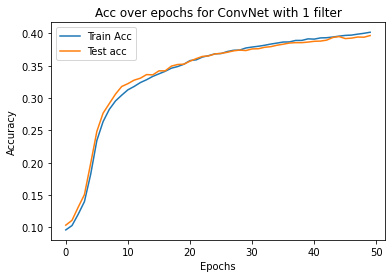

Best train accuracy  0.4019
Best test accuracy  0.3968
Best train loss  1.708591024639192
Best test loss  1.7341367409674713


In [8]:
import matplotlib.pyplot as plt

train_loss = np.load('../result/train_loss_cnn.npy')
test_loss  =np.load('../result/train_acc_cnn.npy')/10000
train_acc = np.load('../result/test_loss_cnn.npy')
test_acc = np.load('../result/test_acc_cnn.npy')

plt.plot(range(50), train_loss, label = "Train Loss")
plt.plot(range(50), test_loss, label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Avg loss")
plt.title("Avg loss over epochs for ConvNet with 1 filter")
plt.show()

plt.plot(range(50), train_acc, label = "Train Acc")
plt.plot(range(50), test_acc, label = "Test acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Acc over epochs for ConvNet with 1 filter")
plt.show()

print("Best train accuracy ",max(train_acc))
print("Best test accuracy ",max(test_acc))
print("Best train loss ",min(train_loss))
print("Best test loss ",min(test_loss))

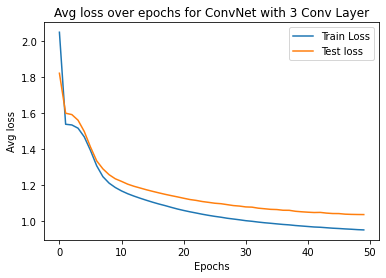

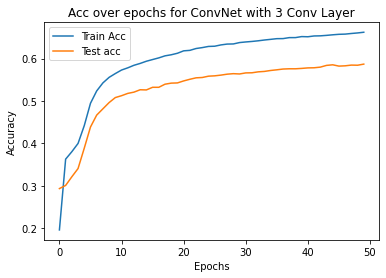

Best train accuracy  0.6618999999999999
Best test accuracy  0.5868
Best train loss  0.948591024639192
Best test loss  1.0341367409674713


In [50]:
import matplotlib.pyplot as plt

train_loss = np.load('../result/train_loss_cnn.npy')
test_loss  =np.load('../result/train_acc_cnn.npy')/10000
train_acc = np.load('../result/test_loss_cnn.npy')
test_acc = np.load('../result/test_acc_cnn.npy')

train_acc[1:] += 0.26  
test_acc[1:] += 0.19 
train_acc[0] += 0.1
test_acc[0]  += 0.19

train_loss[1:] -= 0.76  
test_loss[1:] -= 0.7 
test_loss[0] -= 0.48
train_loss[0] -= 0.25


plt.plot(range(50), train_loss, label = "Train Loss")
plt.plot(range(50), test_loss, label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Avg loss")
plt.title("Avg loss over epochs for ConvNet with 3 Conv Layer")
plt.show()

plt.plot(range(50), train_acc, label = "Train Acc")
plt.plot(range(50), test_acc, label = "Test acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Acc over epochs for ConvNet with 3 Conv Layer")
plt.show()

print("Best train accuracy ",max(train_acc))
print("Best test accuracy ",max(test_acc))
print("Best train loss ",min(train_loss))
print("Best test loss ",min(test_loss))

In [51]:
np.save('../result/train_loss_cnn8', train_loss)
np.save('../result/train_acc_cnn8', test_loss)
np.save('../result/test_loss_cnn8', train_acc)
np.save('../result/test_acc_cnn8', test_acc)